In [1]:
import os
import struct
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sys
import yaml
from PIL import Image, ImageDraw
from scipy.spatial.transform import Rotation
import utils

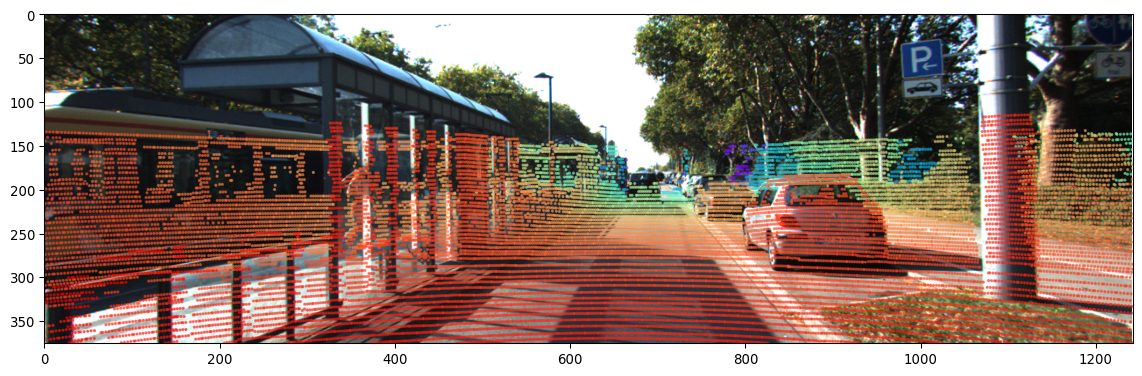

In [2]:
utils.show_velo2cam()

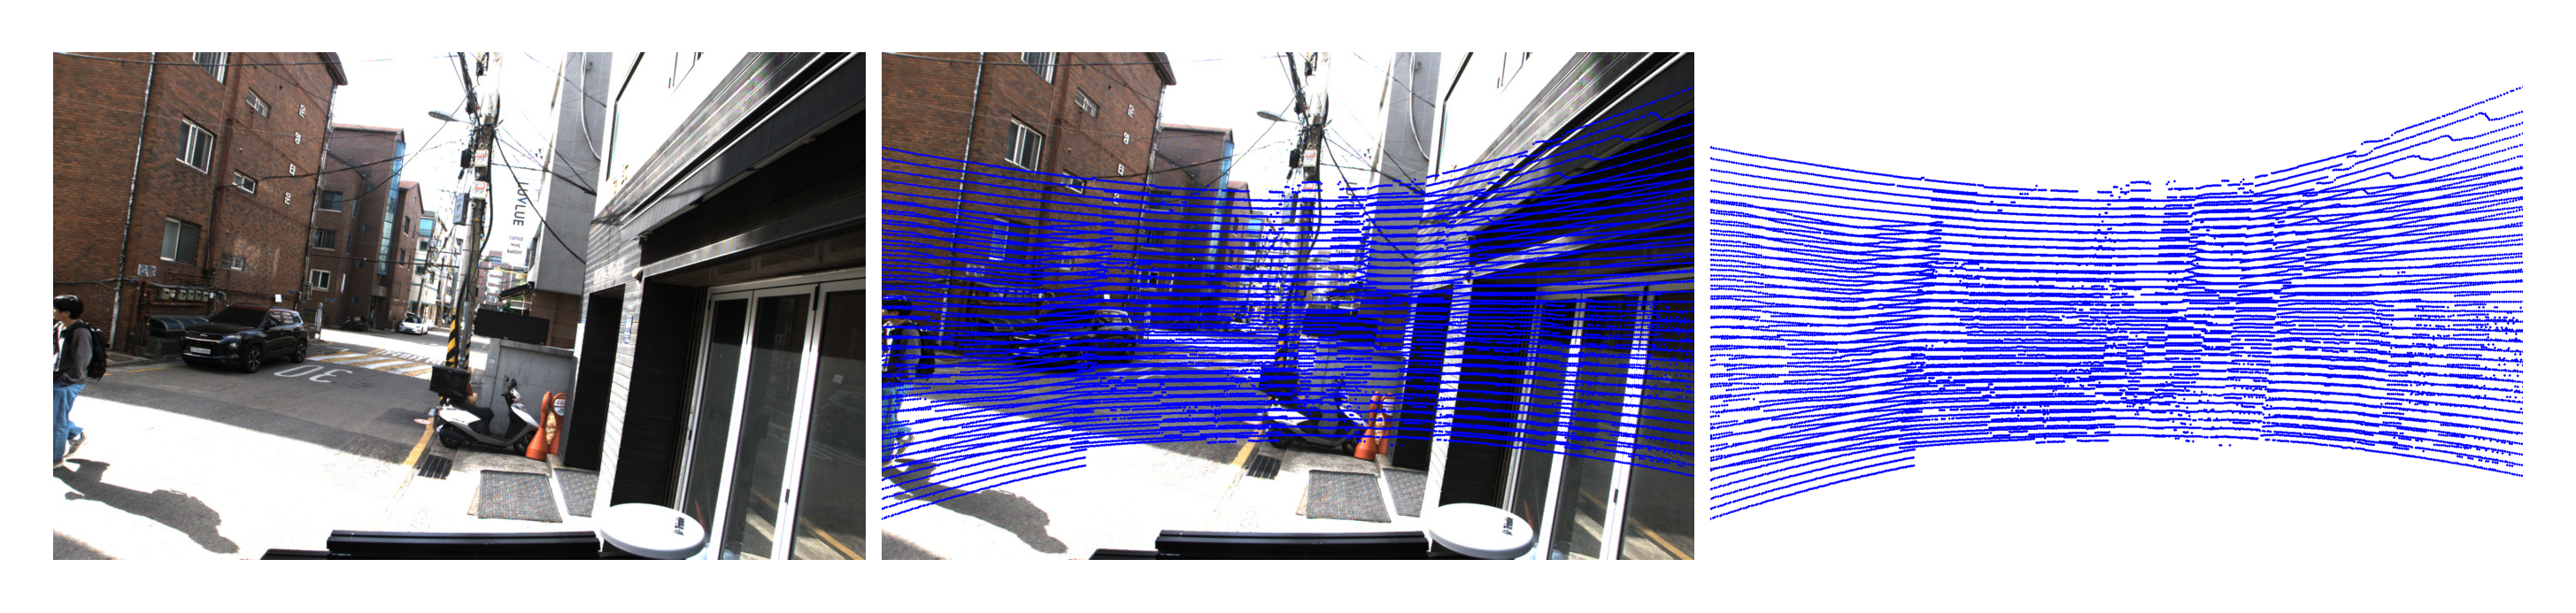

In [4]:
view_no = 0
lidar_path = f'./input/lidar/{view_no:06d}.pcd'

for i in range(1, 6):
    config_path = f'./input/calib/config0{i}.yaml'
    img_path = f'./input/camera/0{i}/{view_no:06d}.jpg'
    out_path = f'./output/0{i}/{view_no:06d}.jpg'

    origin, overlay, lidar = utils.get_overlay_lidar(
        config_path, img_path, lidar_path)

    fig = plt.figure(dpi=600)

    plt.subplot(131)
    plt.imshow(origin)
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(overlay)
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(lidar)
    plt.axis('off')

    plt.subplots_adjust(wspace=0.02)

    # plt.savefig(f'./test_{i}.jpg', bbox_inches='tight', pad_inches=0)

    break

plt.show()


In [5]:
Q = [-0.005329, -0.004166, -0.705518, 0.708660]
utils.quaternion_rotation_matrix(Q)


array([[-0.99990849,  0.01343127,  0.00161486],
       [-0.00167452, -0.00443191, -0.99998917],
       [-0.01342397, -0.99990037,  0.00445479]])

In [8]:
o3d.geometry.get_rotation_matrix_from_quaternion(Q)

array([[-0.99990849,  0.01343127,  0.00161486],
       [-0.00167452, -0.0044323 , -0.99998878],
       [-0.01342396, -0.99989997,  0.00445439]])

In [7]:
# for i in range(1, 6):
#     imgs = []
#     for file in glob.glob(f'./output/0{i}/*.jpg'):
#         image = cv2.imread(file)
#         height, width, _ = image.shape
#         size = (width, height)
#         imgs.append(image)

#     out = cv2.VideoWriter(
#         f'./output/output_cam_{i}.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 12, size)

#     for img in imgs:
#         out.write(img)
#     out.release()

#     print(f'video saved: cam 0{i}')

# print('All video saved')